In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from scipy import stats
import optuna
import os

c:\Users\a\Documents\UBA\machine learning 2\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def read_data(input_path) -> pd.DataFrame:
    """
    Reads data from the specified input_path.

    :return Dataframe 
    :rtype: pd.DataFrame
    """

    items = os.listdir(input_path)

    for dataset in items:
        if dataset.lower().startswith('train'):
            train_path = dataset

    data_train = pd.read_csv(input_path + train_path, index_col=0)

    return data_train

In [16]:
data_frame = read_data('../data/output/')

In [76]:
data_frame = read_data('../data/output/')
x_data = data_frame.drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(
x_data, data_frame['Item_Outlet_Sales'], test_size=0.3, random_state=28)

def objective_linear(trial: optuna.Trial):
 
    alpha = trial.suggest_float('alpha',0.0,10)
    l1_ratio = trial.suggest_float('l1_ratio', 0.05,1.0)
    intercept = trial.suggest_categorical('fit_intercept',[True,False])
    tol = trial.suggest_float('tol',0.001,0.01,log = True)
    selection = trial.suggest_categorical("selection",['random','cyclic'])
    solver = trial.suggest_categorical("solver", ["auto", "svd","cholesky", "lsqr", "saga", "sag"])
    elastic_net = Lasso(alpha = alpha,
                              fit_intercept = intercept ,
                              tol=tol,
                             selection=selection
                             ,random_state=0)
    
    elastic_net.fit(x_train, y_train)
    
    pred = elastic_net.predict(x_val)
    mse_train = metrics.mean_squared_error(y_train, elastic_net.predict(x_train))
    r2_train = elastic_net.score(x_train, y_train)

    # print('TRAINING: RMSE: %f - R2: %f', mse_train**0.5 ,r2_train)

    mse_val = metrics.mean_squared_error(y_val, pred)
    r2_val = elastic_net.score(x_val, y_val)
    # print('VALIDATION: RMSE: %f - R2: %f' ,mse_val**0.5  ,r2_val)


    # # Constante del elastic_net
    # print('\nIntersection: %s', elastic_net.intercept_)

    # Coeficientes del elastic_net
    return r2_val

    

In [147]:
data_frame = read_data('../data/output/')
x_data = data_frame.drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(
x_data, data_frame['Item_Outlet_Sales'], test_size=0.3, random_state=28)

def objective_Forest(trial: optuna.Trial):
 
    n_estimators = trial.suggest_int('n_estimators', 500, 700)
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int('max_depth', 7, 11)
    #min_samples_split = trial.suggest_int("min_samples_split", 1, 2)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Crear el clasificador con los hiperparámetros sugeridos por Optuna
    forest = RandomForestRegressor(
                                    n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    #min_samples_split=min_samples_split,
                                    #min_samples_leaf=min_samples_leaf,
                                    criterion = criterion,
                                    n_jobs= -1
                                    )
    
    forest.fit(x_train, y_train)
    
    pred = forest.predict(x_val)
    mse_train = metrics.mean_squared_error(y_train, forest.predict(x_train))
    r2_train = forest.score(x_train, y_train)

    # print('TRAINING: RMSE: %f - R2: %f', mse_train**0.5 ,r2_train)

    mse_val = metrics.mean_squared_error(y_val, pred)
    r2_val = forest.score(x_val, y_val)
    # print('VALIDATION: RMSE: %f - R2: %f' ,mse_val**0.5  ,r2_val)


    # # Constante del elastic_net
    # print('\nIntersection: %s', elastic_net.intercept_)

    # Coeficientes del elastic_net
    return r2_val

    

In [104]:
data_frame = read_data('../data/output/')
x_data = data_frame.drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(
x_data, data_frame['Item_Outlet_Sales'], test_size=0.3, random_state=28)

def objective_GradientBoost(trial: optuna.Trial):
    
    learning_rate = trial.suggest_float('learning_rate',0.01,0.1)
    n_estimators = trial.suggest_int('n_estimators', 100, 500, log=True)
    loss = trial.suggest_categorical('loss',['squared_error', 'huber'])
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int('max_depth', 6, 12)
    #min_samples_split = trial.suggest_float("min_samples_split", 0.01, 1)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Crear el clasificador con los hiperparámetros sugeridos por Optuna
    forest = GradientBoostingRegressor(
        #learning_rate= learning_rate,
        loss = loss,
                                    n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    #min_samples_split=min_samples_split,
                                    #min_samples_leaf=min_samples_leaf,
                                    criterion = 'squared_error',
                           
                                    )
    
    forest.fit(x_train, y_train)
    
    pred = forest.predict(x_val)
    mse_train = metrics.mean_squared_error(y_train, forest.predict(x_train))
    r2_train = forest.score(x_train, y_train)

    # print('TRAINING: RMSE: %f - R2: %f', mse_train**0.5 ,r2_train)

    mse_val = metrics.mean_squared_error(y_val, pred)
    r2_val = forest.score(x_val, y_val)
    # print('VALIDATION: RMSE: %f - R2: %f' ,mse_val**0.5  ,r2_val)


    # # Constante del elastic_net
    # print('\nIntersection: %s', elastic_net.intercept_)

    # Coeficientes del elastic_net
    return r2_val

    

In [129]:
data_frame = read_data('../data/output/')
x_data = data_frame.drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(
x_data, data_frame['Item_Outlet_Sales'], test_size=0.3, random_state=28)

def objective_Tree(trial: optuna.Trial):
    
    #learning_rate = trial.suggest_float('learning_rate',0.2,0.5)
    #n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    #loss = trial.suggest_categorical('loss',['squared_error', 'huber'])
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int('max_depth', 4, 22)
    #min_samples_split = trial.suggest_float("min_samples_split", 0.01, 1)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Crear el clasificador con los hiperparámetros sugeridos por Optuna
    forest = DecisionTreeRegressor(
        #learning_rate= learning_rate,
        #loss = 'linear',
                                    #n_estimators=n_estimators,
                                    #random_state=0
                                    max_depth=max_depth,
                                    #min_samples_split=min_samples_split,
                                    #min_samples_leaf=min_samples_leaf,
                                    criterion = criterion,
                           
                                    )
    
    forest.fit(x_train, y_train)
    
    pred = forest.predict(x_val)
    mse_train = metrics.mean_squared_error(y_train, forest.predict(x_train))
    r2_train = forest.score(x_train, y_train)

    # print('TRAINING: RMSE: %f - R2: %f', mse_train**0.5 ,r2_train)

    mse_val = metrics.mean_squared_error(y_val, pred)
    r2_val = forest.score(x_val, y_val)
    # print('VALIDATION: RMSE: %f - R2: %f' ,mse_val**0.5  ,r2_val)


    # # Constante del elastic_net
    # print('\nIntersection: %s', elastic_net.intercept_)

    # Coeficientes del elastic_net
    return r2_val

    

In [130]:
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler= sampler)
study.optimize(objective_Tree, n_trials=50)
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-14 23:23:38,673] A new study created in memory with name: no-name-2c1b67a6-fc4a-459a-a2b2-11f8520ca785
[I 2023-06-14 23:23:38,738] Trial 0 finished with value: 0.331068356155509 and parameters: {'criterion': 'friedman_mse', 'max_depth': 17}. Best is trial 0 with value: 0.331068356155509.
[I 2023-06-14 23:23:38,778] Trial 1 finished with value: 0.5738068251999415 and parameters: {'criterion': 'squared_error', 'max_depth': 6}. Best is trial 1 with value: 0.5738068251999415.
[I 2023-06-14 23:23:38,841] Trial 2 finished with value: 0.37469487337720475 and parameters: {'criterion': 'friedman_mse', 'max_depth': 15}. Best is trial 1 with value: 0.5738068251999415.
[I 2023-06-14 23:23:38,911] Trial 3 finished with value: 0.2588555981154489 and parameters: {'criterion': 'squared_error', 'max_depth': 22}. Best is trial 1 with value: 0.5738068251999415.
[I 2023-06-14 23:23:38,945] Trial 4 finished with value: 0.5658459632875563 and parameters: {'criterion': 'squared_error', 'max_depth'

Best trial: score 0.5916246116950783, params {'criterion': 'friedman_mse', 'max_depth': 4}


In [105]:
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler= sampler)
study.optimize(objective_GradientBoost, n_trials=50)
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-14 22:48:08,609] A new study created in memory with name: no-name-b0963055-5da6-4ae1-83ad-d0c556176b76
[I 2023-06-14 22:48:17,999] Trial 0 finished with value: 0.5070196618585538 and parameters: {'learning_rate': 0.04370861069626263, 'n_estimators': 462, 'loss': 'squared_error', 'criterion': 'squared_error', 'max_depth': 6}. Best is trial 0 with value: 0.5070196618585538.
[I 2023-06-14 22:48:23,995] Trial 1 finished with value: 0.5251929049906798 and parameters: {'learning_rate': 0.08795585311974417, 'n_estimators': 263, 'loss': 'squared_error', 'criterion': 'squared_error', 'max_depth': 7}. Best is trial 1 with value: 0.5251929049906798.
[I 2023-06-14 22:48:43,858] Trial 2 finished with value: 0.5007350223675381 and parameters: {'learning_rate': 0.02636424704863906, 'n_estimators': 134, 'loss': 'huber', 'criterion': 'squared_error', 'max_depth': 10}. Best is trial 1 with value: 0.5251929049906798.
[I 2023-06-14 22:49:00,014] Trial 3 finished with value: 0.5134667948047928 a

Best trial: score 0.5672137492715772, params {'learning_rate': 0.06548614175086606, 'n_estimators': 101, 'loss': 'huber', 'criterion': 'squared_error', 'max_depth': 6}


In [80]:
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler= sampler)
study.optimize(objective_linear, n_trials=50)
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-14 22:15:59,236] A new study created in memory with name: no-name-5b274e0a-3175-42bd-b835-a0d246fe0290
[I 2023-06-14 22:15:59,293] Trial 0 finished with value: 0.5526148537067066 and parameters: {'alpha': 3.745401188473625, 'l1_ratio': 0.9531785910894204, 'fit_intercept': True, 'tol': 0.001432249371823025, 'selection': 'random', 'solver': 'saga'}. Best is trial 0 with value: 0.5526148537067066.
[I 2023-06-14 22:15:59,353] Trial 1 finished with value: 0.5526833194449305 and parameters: {'alpha': 2.1233911067827616, 'l1_ratio': 0.2227337188467456, 'fit_intercept': False, 'tol': 0.003347776308515932, 'selection': 'random', 'solver': 'sag'}. Best is trial 1 with value: 0.5526833194449305.
[I 2023-06-14 22:15:59,380] Trial 2 finished with value: 0.5526266383563246 and parameters: {'alpha': 1.9967378215835974, 'l1_ratio': 0.538522716492931, 'fit_intercept': True, 'tol': 0.004050837781329677, 'selection': 'random', 'solver': 'svd'}. Best is trial 1 with value: 0.5526833194449305.
[

Best trial: score 0.5527643308423961, params {'alpha': 4.733483285868233, 'l1_ratio': 0.11807129207335114, 'fit_intercept': False, 'tol': 0.0011566804037886967, 'selection': 'random', 'solver': 'saga'}


In [148]:
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler= sampler)
study.optimize(objective_Forest, n_trials=50)
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-14 23:42:47,103] A new study created in memory with name: no-name-5339f4c6-4a94-4491-9b57-265c8445a698
[I 2023-06-14 23:42:51,101] Trial 0 finished with value: 0.591258982113195 and parameters: {'n_estimators': 575, 'criterion': 'squared_error', 'max_depth': 9}. Best is trial 0 with value: 0.591258982113195.
[I 2023-06-14 23:42:55,066] Trial 1 finished with value: 0.5847832610742116 and parameters: {'n_estimators': 531, 'criterion': 'squared_error', 'max_depth': 11}. Best is trial 0 with value: 0.591258982113195.
[I 2023-06-14 23:42:59,747] Trial 2 finished with value: 0.5849003162320623 and parameters: {'n_estimators': 620, 'criterion': 'squared_error', 'max_depth': 11}. Best is trial 0 with value: 0.591258982113195.
[I 2023-06-14 23:43:03,579] Trial 3 finished with value: 0.5922074523533456 and parameters: {'n_estimators': 667, 'criterion': 'squared_error', 'max_depth': 7}. Best is trial 3 with value: 0.5922074523533456.
[I 2023-06-14 23:43:07,215] Trial 4 finished with va

Best trial: score 0.5929260529701437, params {'n_estimators': 661, 'criterion': 'friedman_mse', 'max_depth': 7}


In [28]:
from torch import nn, optim, cuda, sigmoid
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

In [5]:
data_frame = read_data('../data/output/')
x_data = data_frame.drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(
x_data, data_frame['Item_Outlet_Sales'], test_size=0.3, random_state=28)

In [17]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8523 non-null   float64
 1   Item_Visibility                8523 non-null   float64
 2   Item_MRP                       8523 non-null   int64  
 3   Outlet_Establishment_Year      8523 non-null   int64  
 4   Outlet_Size                    8523 non-null   int64  
 5   Outlet_Location_Type           8523 non-null   int64  
 6   Outlet_Type_Grocery Store      8523 non-null   int64  
 7   Outlet_Type_Supermarket Type1  8523 non-null   int64  
 8   Outlet_Type_Supermarket Type2  8523 non-null   int64  
 9   Outlet_Type_Supermarket Type3  8523 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 732.4 KB


In [93]:
x = x_data.to_numpy()
y =  data_frame['Item_Outlet_Sales'].to_numpy()

In [94]:
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0 ) - np.min(x, axis=0))

In [97]:
idx = np.random.permutation(x_norm.shape[0])
idx

array([8055, 1135, 2338, ..., 3686,  495, 1380])

In [98]:
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]
print(train_idx.shape)
print(valid_idx.shape)

(7244,)
(1279,)


In [99]:
train_x = x_norm[train_idx]
train_y = y[train_idx]
valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]

In [100]:
class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [101]:
train_ds = MyDataset(train_x, train_y)

In [102]:
valid_ds = MyDataset(valid_x, valid_y)

In [103]:
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)

In [197]:
class NNet(nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = nn.Linear(in_features=10 , out_features=4, bias=True)
    self.relu_1 = nn.ReLU()
    self.linear_2 = nn.Linear(in_features = 4, out_features=2, bias=True)
    self.relu_2 = nn.ReLU()
    self.output = nn.Linear(in_features = 2, out_features= 1)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [198]:
nnet = NNet()
loss_function = nn.MSELoss()
optimizer = optim.Adam(nnet.parameters(), lr=0.03, weight_decay=0.01)

In [191]:
device = "cpu"
if cuda.is_available():
  device = "cuda:0"

device

'cpu'

In [199]:
# cantidad de epochs
epochs = 100

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):

  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader):

    x_batch, y_batch = data

    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)


    
    nnet_output = nnet(x_batch)
    y_batch_hat = nnet_output
    

    loss = loss_function(nnet_output, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.r2_score(epoch_y,  epoch_y_hat)

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = nnet_output
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.r2_score(valid_epoch_y,valid_epoch_y_hat)

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 114942.169 / 87286.988 | Train/Valid accuracy: -1.510 / -0.910
 Epoch 1 | Train/Valid loss: 49519.800 / 35308.043 | Train/Valid accuracy: -0.085 / 0.227
 Epoch 2 | Train/Valid loss: 33489.630 / 30508.958 | Train/Valid accuracy: 0.267 / 0.332
 Epoch 3 | Train/Valid loss: 29577.831 / 26504.220 | Train/Valid accuracy: 0.360 / 0.420
 Epoch 4 | Train/Valid loss: 25648.931 / 23067.592 | Train/Valid accuracy: 0.440 / 0.495
 Epoch 5 | Train/Valid loss: 22928.744 / 20818.870 | Train/Valid accuracy: 0.499 / 0.545
 Epoch 6 | Train/Valid loss: 21173.625 / 19613.070 | Train/Valid accuracy: 0.535 / 0.571
 Epoch 7 | Train/Valid loss: 20492.301 / 19163.594 | Train/Valid accuracy: 0.551 / 0.581
 Epoch 8 | Train/Valid loss: 20321.131 / 19030.118 | Train/Valid accuracy: 0.556 / 0.584
 Epoch 9 | Train/Valid loss: 20191.713 / 19037.228 | Train/Valid accuracy: 0.558 / 0.584
 Epoch 10 | Train/Valid loss: 20218.297 / 18945.614 | Train/Valid accuracy: 0.558 / 0.586
 Epoch 11 | Trai

Text(0, 0.5, 'MSE')

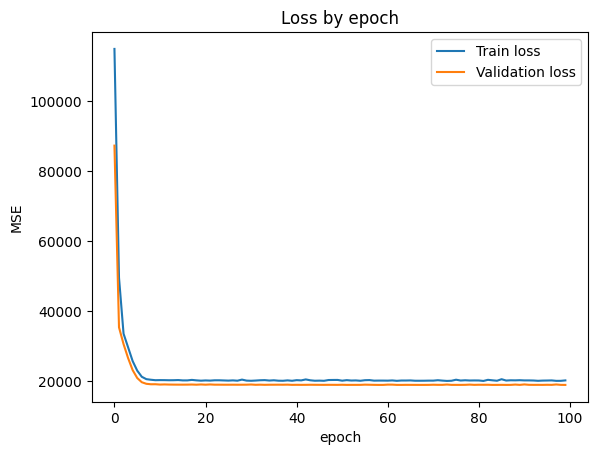

In [200]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("MSE")

In [14]:
data_frame = read_data('../data/output/')

In [12]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,4,21,1,2,3735.1380,0,1,0,0
1,5.920,0.019278,1,11,1,0,443.4228,0,0,1,0
2,17.500,0.016760,2,21,1,2,2097.2700,0,1,0,0
3,19.200,0.000000,3,22,0,0,732.3800,1,0,0,0
4,8.930,0.000000,1,33,2,0,994.7052,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,4,33,2,0,2778.3834,0,1,0,0
8519,8.380,0.046982,2,18,0,1,549.2850,0,1,0,0
8520,10.600,0.035186,1,16,0,1,1193.1136,0,1,0,0
8521,7.210,0.145221,2,11,1,0,1845.5976,0,0,1,0
